In [122]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import pandas as pd
df = pd.read_csv('methods_mean_absolute_relative_error.csv')

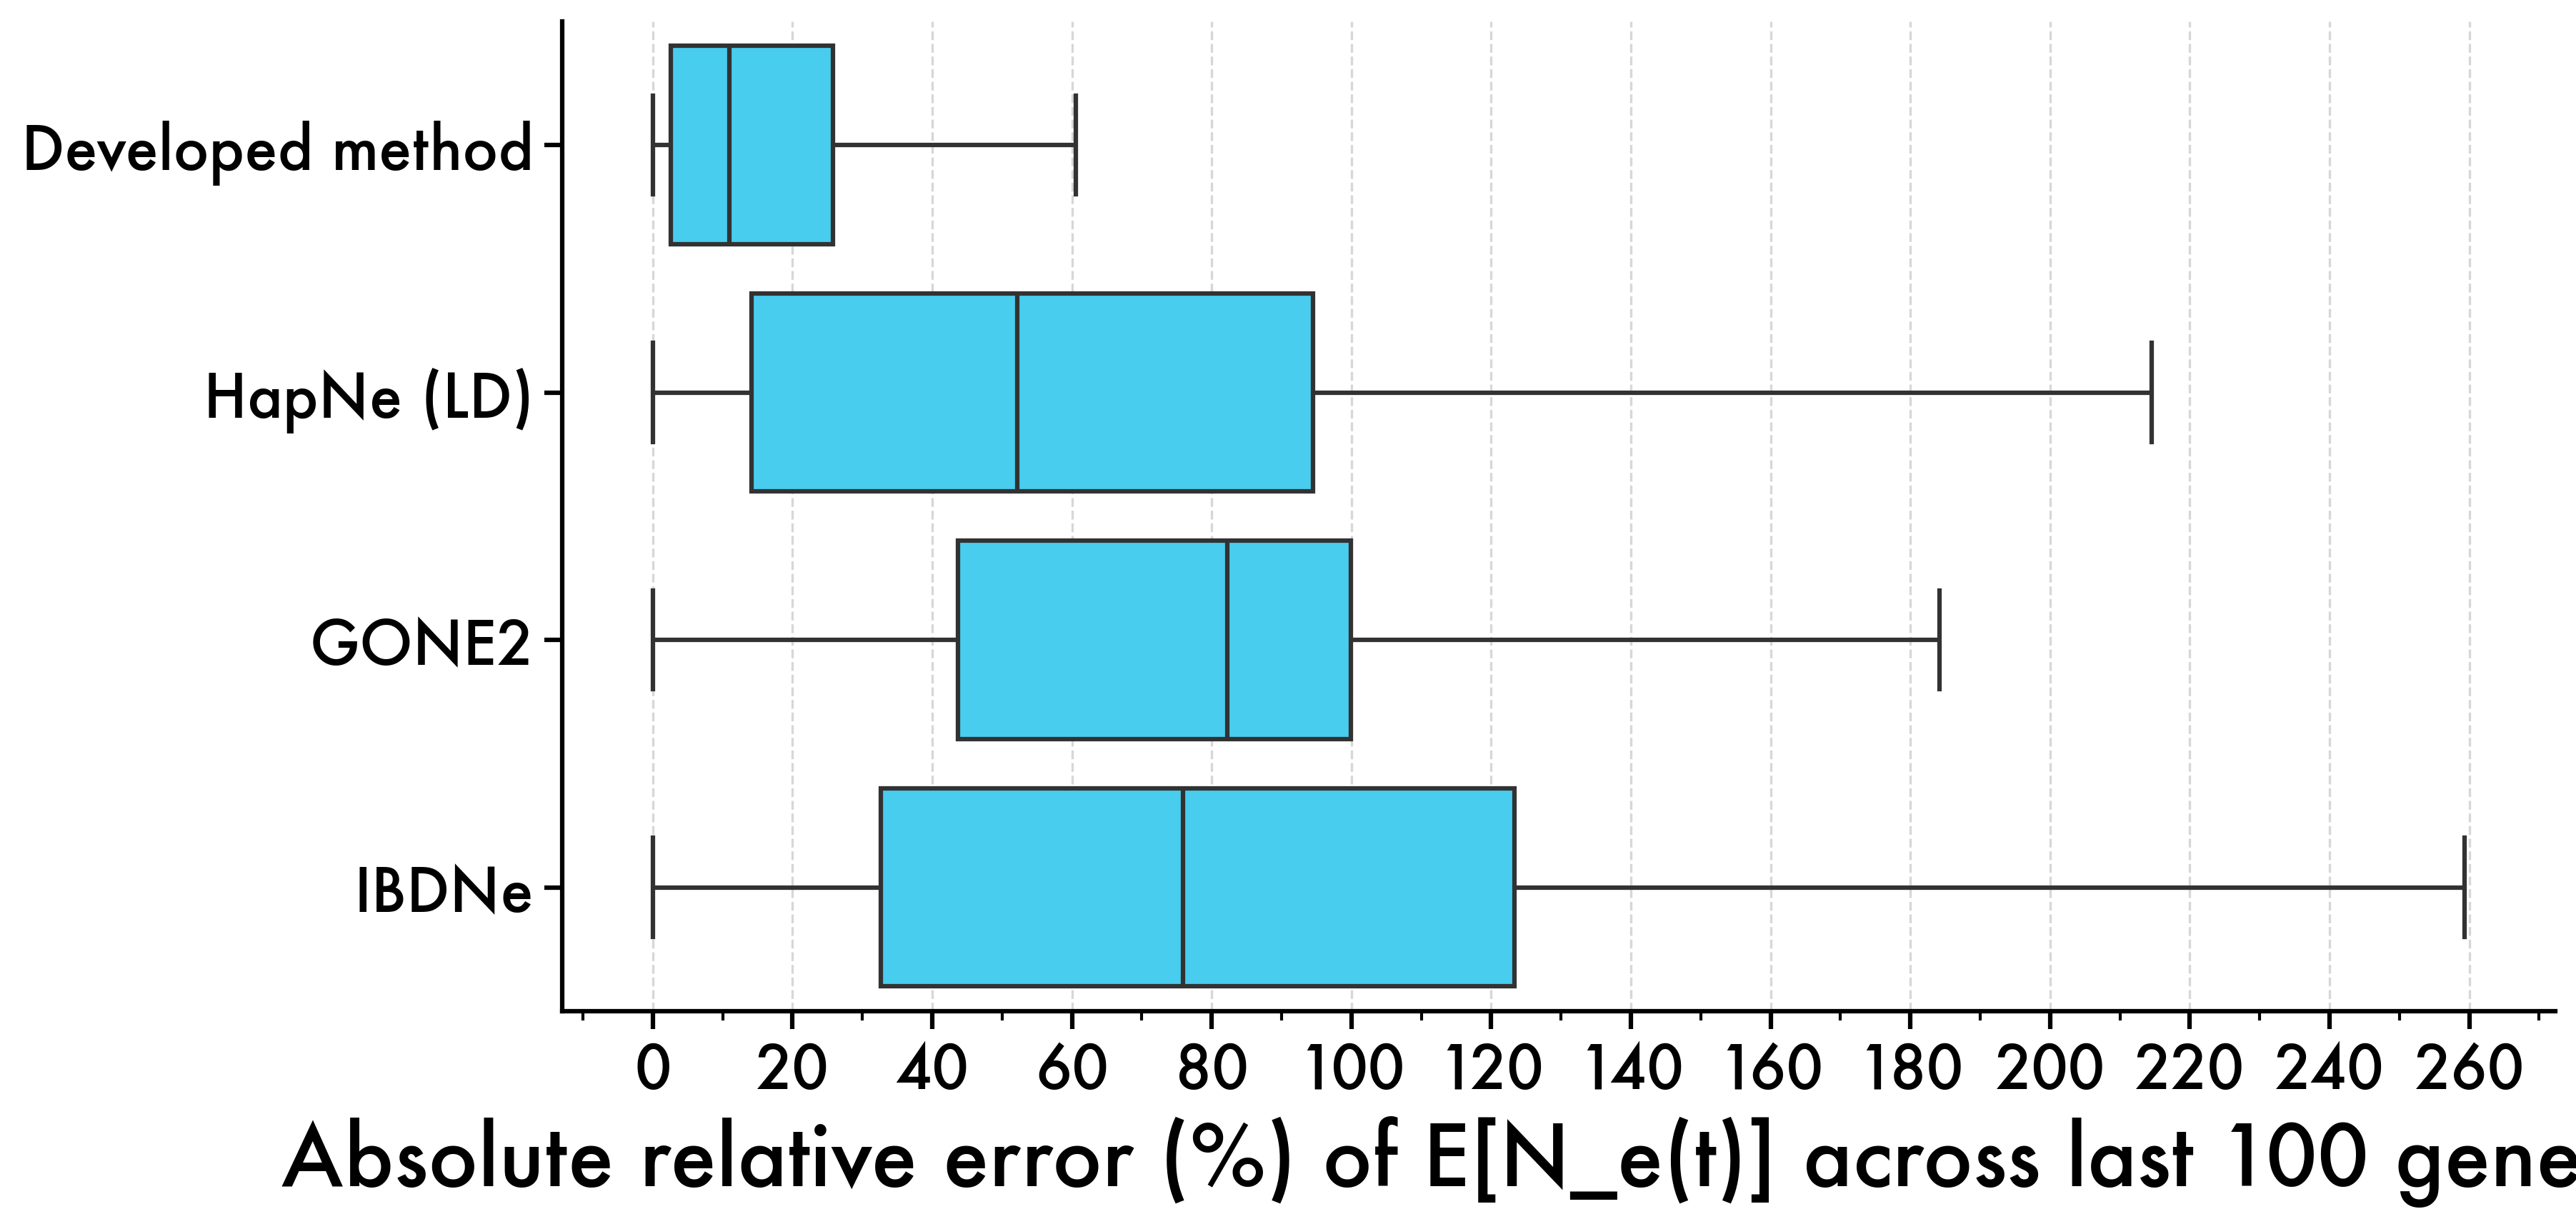

In [151]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

# =====================
# Matplotlib Appearance Settings
# =====================
mpl.rcParams.update({
    "font.family": "Futura",
    "font.size": 20,
    "axes.labelsize": 28,
    "axes.titlesize": 28,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 24,
    "figure.dpi": 300,
    "savefig.dpi": 600,
    "axes.linewidth": 1.5,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.major.width": 1.5,
    "ytick.major.width": 1.5,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

# =====================
# Define Plot Parameters
# =====================
method_rename = {
    "GONE2": "GONE2",
    "IBDNe": "IBDNe",
    "HapNe_LD": "HapNe (LD)",
    "Own": "Developed method"
}
custom_order = ["Own", "HapNe_LD", "GONE2", "IBDNe"]
display_order = [method_rename[m] for m in custom_order if m in method_rename]

# =====================
# Data Preprocessing
# =====================
df_filtered = df[df["Method"].isin(method_rename)].copy()
df_filtered["RelativeError"] *= 100
df_filtered["Method_display"] = df_filtered["Method"].map(method_rename)

# =====================
# Plotting
# =====================
fig, ax = plt.subplots(figsize=(12, 6))

fill_color = colors[2]
line_color = colors[8]
sns.boxplot(
    data=df_filtered,
    x="RelativeError",
    y="Method_display",
    order=display_order,
    showfliers=False,
    linewidth=1.5,
    ax=ax,
    boxprops=dict(facecolor=fill_color, edgecolor=line_color),
    whiskerprops=dict(color=line_color),
    capprops=dict(color=line_color),
    medianprops=dict(color=line_color)
)



# =====================
# Axis and Label Styling
# =====================
ax.set_xlabel("Absolute relative error (%) of E[N_e(t)] across last 100 generations")
ax.set_ylabel("")

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', which='major', length=6, width=1.5)
ax.tick_params(axis='x', which='minor', length=3, width=1)

# =====================
# Additional Styling
# =====================
ax.grid(axis='x', which='major', linestyle='--', alpha=0.5)
sns.despine(ax=ax)

# =====================
# Save and Show
# =====================
fig.savefig("methods_absolute_relative_error.pdf", bbox_inches="tight", pad_inches=0)
plt.show()
